In [2]:
import sys
sys.path.append('../')

import numpy as np
import torch

import matplotlib.pyplot as plt
import matplotlib 
import pandas as pd
import seaborn as sbn
from contextlib import redirect_stdout
import json
import ast

import UsefullFunctions as ufn

In [3]:
with open('frates_labels.json', 'r') as json_file:
    data = json.load(json_file)

frates_actor = np.array(data["frates_actor"])
frates_critic = np.array(data["frates_critic"])
final_actions = np.array(data["final_actions"])
global_values = np.array(data["global_values"])
stimuli = np.array(data["stimuli"])

print(frates_actor.shape,stimuli.shape)

(999, 128) (999, 4)


average over 10 epochs of test scores:  0.8739999999999999
average over 10 epochs of test random scores:  0.502
----------
training score:  0.9211514392991239
test score:  0.915 
----------


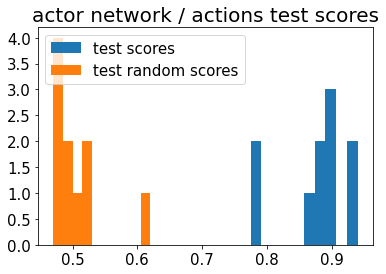

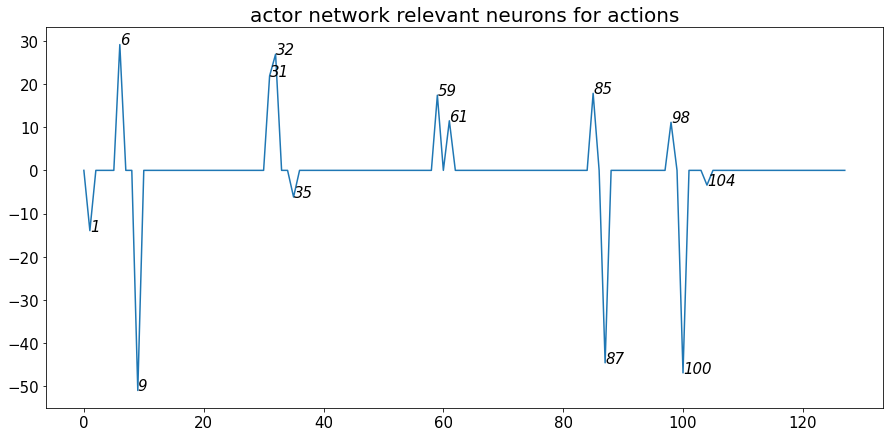

In [10]:
net = {"X" : frates_actor, "network" : "actor"}
#net = {"X" : frates_critic, "network" : "critic"}

label = {"Y" : final_actions, "label" : "actions"}
#label = {"Y" : , "label" : "right_values"}
#label = {"Y" : , "label" : "left_values"}
#label = {"Y" : global_values, "label" : "global_values"}

#model = {"model" : 'perceptron', "param" : 0}
model = {"model" : 'perceptronL1', "param" : 0.005}
#model = {"model" : 'svm', "param" : 0.001}

ufn.rel_nurons(X=net["X"], Y=label["Y"], model=model["model"], C=model["param"], network=net["network"], label=label["label"])

[  9 100  87   6  32  31  85  59   1  61]
[[3.   0.5  2.   0.5 ]
 [2.   0.75 3.   0.75]
 [3.   0.25 1.   0.75]
 ...
 [3.   0.25 3.   0.25]
 [3.   0.75 1.   0.25]
 [2.   0.5  3.   0.5 ]]


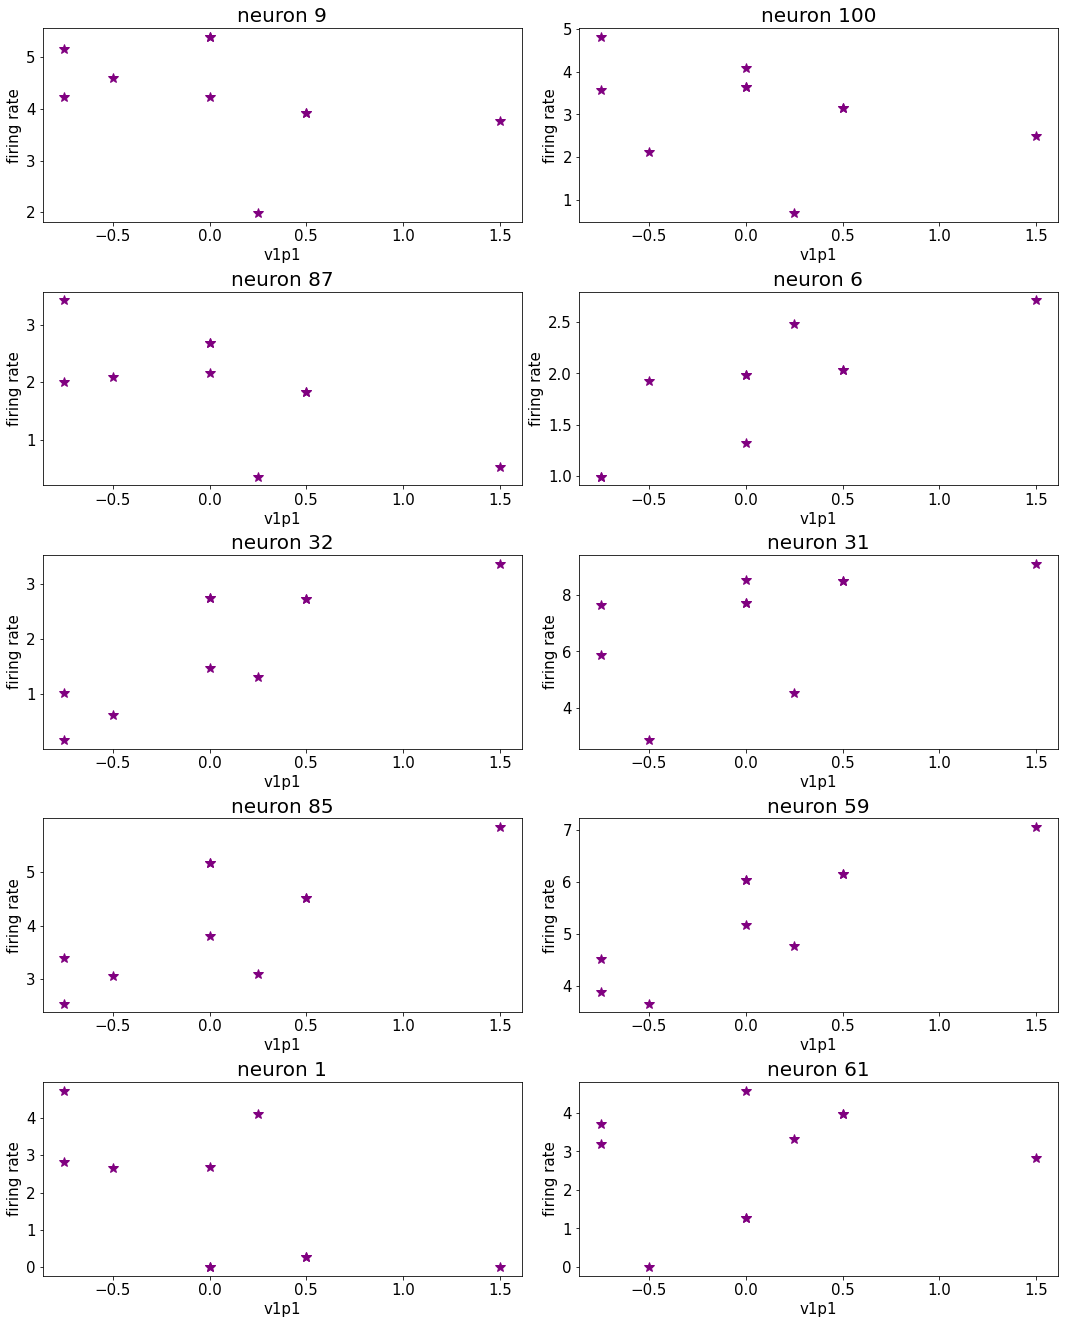

In [11]:
net = {"X" : frates_actor, "network" : "actor"}
#net = {"X" : frates_critic, "network" : "critic"}

label = {"Y" : final_actions, "label" : "actions"}
#label = {"Y" : , "label" : "right_values"}
#label = {"Y" : , "label" : "left_values"}
#label = {"Y" : global_values, "label" : "global_values"}

if net["network"] == "actor":
    with open("clf_data/"+label["label"]+"/relevant_neurons_actor.txt", 'r') as file:
        file_content = file.read()
else:
    with open("clf_data/"+label["label"]+"relevant_neurons_critic.txt", 'r') as file:
        file_content = file.read()

parsed_content = ast.literal_eval(file_content)
relevant_neurons = np.asarray(parsed_content)
print(relevant_neurons)
print(stimuli)

ufn.tuning_curves(relevant_neurons, net["X"], stimuli, net["network"], label["label"])

In [8]:
import Reinforce as rln
    
values_probs = np.array([2, 3, 0.25, 0.5])
v1s = np.array([values_probs[0]])
v2s = np.array([values_probs[1]])
p1s = np.array([values_probs[2]])
p2s = np.array([values_probs[3]])

reinforce = rln.REINFORCE(name_load_actor="models/RL_actor_network_good.pt",
                          name_load_critic="models/RL_critic_network_good.pt",
                          v1s=v1s, v2s=v2s, p1s=p1s, p2s=p2s)
observations, rewards, actions,\
log_action_probs, entropies, values,\
trial_begins, errors, frates_actor, frates_critic,\
timeav_values, final_actions, global_values, stimuli = reinforce.experience(100)

iteration 100


In [10]:
df = pd.DataFrame(stimuli)
display(df)
print(stimuli)

,0,1,2,3
0,2.0,0.25,3.0,0.5
1,2.0,0.25,3.0,0.5
2,2.0,0.25,3.0,0.5
3,2.0,0.25,3.0,0.5
4,2.0,0.25,3.0,0.5
...,...,...,...,...
95,2.0,0.25,3.0,0.5
96,2.0,0.25,3.0,0.5
97,2.0,0.25,3.0,0.5
98,2.0,0.25,3.0,0.5


[array([2.  , 0.25, 3.  , 0.5 ]), array([2.  , 0.25, 3.  , 0.5 ]), array([2.  , 0.25, 3.  , 0.5 ]), array([2.  , 0.25, 3.  , 0.5 ]), array([2.  , 0.25, 3.  , 0.5 ]), array([2.  , 0.25, 3.  , 0.5 ]), array([2.  , 0.25, 3.  , 0.5 ]), array([2.  , 0.25, 3.  , 0.5 ]), array([2.  , 0.25, 3.  , 0.5 ]), array([2.  , 0.25, 3.  , 0.5 ]), array([2.  , 0.25, 3.  , 0.5 ]), array([2.  , 0.25, 3.  , 0.5 ]), array([2.  , 0.25, 3.  , 0.5 ]), array([2.  , 0.25, 3.  , 0.5 ]), array([2.  , 0.25, 3.  , 0.5 ]), array([2.  , 0.25, 3.  , 0.5 ]), array([2.  , 0.25, 3.  , 0.5 ]), array([2.  , 0.25, 3.  , 0.5 ]), array([2.  , 0.25, 3.  , 0.5 ]), array([2.  , 0.25, 3.  , 0.5 ]), array([2.  , 0.25, 3.  , 0.5 ]), array([2.  , 0.25, 3.  , 0.5 ]), array([2.  , 0.25, 3.  , 0.5 ]), array([2.  , 0.25, 3.  , 0.5 ]), array([2.  , 0.25, 3.  , 0.5 ]), array([2.  , 0.25, 3.  , 0.5 ]), array([2.  , 0.25, 3.  , 0.5 ]), array([2.  , 0.25, 3.  , 0.5 ]), array([2.  , 0.25, 3.  , 0.5 ]), array([2.  , 0.25, 3.  , 0.5 ]), array([2.

In [2]:
reinforce = rln.REINFORCE()

epochs = 5
n_trs = 15
lr_a = 1e-4
lr_c = 1e-4

reinforce.training(n_trs=n_trs, epochs=epochs, lr_a=lr_a, lr_c=lr_c, hyper_l=0, cuda=False,
                   train_actor=True, train_critic= True)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.649022,1.852098,2.291425,2.682045,1.512593,2.090181,1.982176,2.357668,2.090181,2.357668,2.247119,2.117893,1.982176,2.153972
1,2.473183,3.254186,3.811123,3.226659,2.942348,3.875318,2.855718,3.520187,3.875318,3.520187,2.711988,3.001355,2.855718,3.200887
2,0.185657,0.000000,0.000000,0.000000,0.050029,0.000000,0.000000,0.000000,0.000000,0.000000,0.060652,0.000000,0.000000,0.000000
3,0.033883,0.543714,0.535049,0.357811,0.133977,0.227470,0.491693,0.372669,0.227470,0.372669,0.105445,0.523585,0.491693,0.258708
4,0.044365,0.039554,0.047423,0.086944,0.033263,0.029503,0.071051,0.056348,0.029503,0.056348,0.089175,0.064892,0.071051,0.070837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
124,2.194165,1.292211,0.648012,1.176070,1.961418,0.991395,1.679193,1.036260,0.991395,1.036260,2.095475,1.448873,1.679193,1.451643
125,2.806308,4.948673,5.327431,5.735359,3.312012,3.254248,6.328674,4.512148,3.254248,4.512148,4.330105,6.178105,6.328674,4.829769
126,0.025047,0.185810,0.074686,1.094366,0.000000,0.000000,0.830478,0.386319,0.000000,0.386319,0.589600,0.838868,0.830478,0.347143


iteration 1 - 3.60 s so far


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.978089,2.090987,1.723902,1.576414,2.305848,2.016546,2.016546,1.499841,1.231223,2.436688,1.638403,1.785681,2.109257,1.937649
1,3.383940,2.531956,3.532777,3.251920,3.465853,3.787805,3.787805,3.386194,2.231034,2.907793,3.094451,3.214388,3.864795,2.776253
2,0.000000,0.142683,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.348915,0.000000,0.000000,0.000000,0.000000,0.021061
3,0.596447,0.000000,1.252477,0.856375,0.795745,1.450140,1.450140,0.972807,0.138240,0.291970,0.971919,1.022058,0.218163,0.322820
4,0.034666,0.069658,0.024834,0.020498,0.046024,0.019607,0.019607,0.016671,0.029017,0.100460,0.034866,0.032110,0.028960,0.054013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
124,1.100078,2.218680,0.589752,1.141129,0.689571,0.242424,0.242424,1.008543,2.488013,1.659434,1.188385,0.968666,1.009560,1.916139
125,4.758657,2.425337,7.688338,5.048175,6.479056,7.364657,7.364657,5.965435,3.221312,5.977917,7.058304,6.909365,3.217469,4.410927
126,0.178712,0.105608,0.086477,0.047936,0.572996,0.138610,0.138610,0.000000,0.000000,1.025222,0.359813,0.366342,0.000000,0.361057


iteration 2 - 7.10 s so far


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,2.028366,2.010728,2.084925,1.698784,1.633947,2.234856,2.590543,1.935164,2.211801,2.590543,2.011609,1.235418,1.601936,2.432993
1,3.817324,2.852698,2.544757,2.611781,3.110336,3.817147,3.967715,3.020322,3.671098,3.967715,3.220252,2.381256,3.214902,2.922621
2,0.000000,0.000000,0.148331,0.115088,0.000000,0.000000,0.000000,0.023152,0.000000,0.000000,0.000000,0.254860,0.000000,0.000000
3,0.849630,0.457557,0.000000,0.038560,0.950566,0.997870,0.714077,0.009542,0.428412,0.714077,0.680791,0.148461,0.209913,0.274290
4,0.023565,0.068780,0.068238,0.037220,0.034195,0.036371,0.059430,0.055718,0.051536,0.059430,0.054352,0.025364,0.025178,0.098995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
124,0.536731,1.714126,2.222194,1.954519,1.194608,0.300135,0.234509,1.974486,0.877464,0.234509,1.133899,2.224392,1.501746,1.668255
125,5.357566,6.258455,2.411539,2.629540,7.042256,7.243307,6.982183,2.979308,5.459908,6.982183,6.753882,3.075441,2.956323,5.957379
126,0.004629,0.782260,0.097090,0.012880,0.349045,0.238732,0.423327,0.000542,0.024029,0.423327,0.530783,0.000000,0.000000,1.006661


iteration 3 - 10.65 s so far


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,2.287215,1.647413,1.483521,2.018649,2.045252,1.869239,2.201538,1.652908,1.688686,1.342561,2.657124,1.544683,1.087207,2.112050
1,3.833436,2.326234,3.420506,3.834658,2.394028,3.692417,3.688158,3.682564,2.626277,3.033292,3.645454,3.104191,2.859083,2.712619
2,0.000000,0.301423,0.000000,0.000000,0.247306,0.000000,0.000000,0.000000,0.118259,0.000000,0.000000,0.001874,0.105186,0.071134
3,0.487177,0.000778,0.935181,0.831446,0.000000,1.295885,0.412168,1.105226,0.027232,0.673519,0.506362,0.138254,0.259378,0.000000
4,0.044577,0.046705,0.015882,0.022871,0.073899,0.020772,0.050046,0.013385,0.036146,0.024881,0.067547,0.027421,0.017035,0.058740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
124,0.675132,2.485606,1.015783,0.539841,2.493596,0.382129,0.880510,0.601738,1.955219,1.577439,0.629332,1.741182,2.000244,1.959305
125,5.271056,2.870447,5.946049,5.347065,2.533906,7.495929,5.449884,5.600955,2.618824,5.318578,6.179517,3.085425,3.534234,2.285952
126,0.049035,0.008866,0.000000,0.003123,0.079877,0.090305,0.020168,0.000000,0.010474,0.029185,0.772549,0.000000,0.000000,0.101742


iteration 4 - 14.19 s so far


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.948888,2.024225,1.571504,2.671769,1.556389,1.185774,1.976182,1.905074,2.316563,1.602990,2.490604,1.141529,1.912298,1.556389
1,3.205707,3.801300,3.247437,3.263709,3.603320,3.585440,2.891395,3.048524,2.907133,3.709845,3.520641,3.127538,3.710885,3.603320
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023620,0.013580,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.015164,0.107211,0.168948,0.289767,0.210357,0.517014,0.413933,0.001864,0.083112,0.291102,0.442186,0.353366,0.729981,0.210357
4,0.046027,0.029744,0.023880,0.081587,0.018223,0.008935,0.066192,0.052908,0.076423,0.016620,0.073206,0.014112,0.025042,0.018223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
124,1.736468,1.227260,1.498458,1.217416,1.488753,1.323512,1.717949,1.973076,1.887203,1.273705,0.851052,1.510975,0.742895,1.488753
125,2.794338,3.401966,2.950305,5.644612,3.830963,3.875036,6.238805,2.970319,4.076213,3.634710,6.313211,3.255965,5.518297,3.830963
126,0.000960,0.000000,0.000000,1.021302,0.000000,0.000000,0.761035,0.000000,0.536972,0.000000,0.740052,0.000000,0.000000,0.000000


iteration 5 - 17.67 s so far

DEVICE: cpu. It took 0.29 m for 5 epochs. 15 trials per epoch.


,0.25,0.5,0.75,1.0,1.5,2.25
0.25,0.0,0.0,1.0,1.0,0.0,1.0
0.5,4.0,0.0,0.0,0.0,0.0,0.0
0.75,1.0,3.0,0.0,0.0,0.0,0.0
1.0,2.0,4.0,1.0,0.0,0.0,0.0
1.5,0.0,6.0,5.0,3.0,0.0,0.0
2.25,0.0,1.0,2.0,0.0,1.0,0.0


,0.25,0.5,0.75,1.0,1.5,2.25
0.25,0.0,1.0,1.0,0.0,2.0,0.0
0.5,0.0,0.0,5.0,1.0,3.0,0.0
0.75,0.0,0.0,0.0,2.0,4.0,1.0
1.0,0.0,0.0,0.0,0.0,2.0,1.0
1.5,0.0,0.0,0.0,0.0,0.0,1.0
2.25,0.0,0.0,0.0,0.0,0.0,0.0


,0.25,0.5,0.75,1.0,1.5,2.25
0.25,0.0,0.0,0.5,1.0,0.0,1.0
0.5,1.0,0.0,0.0,0.0,0.0,0.0
0.75,1.0,1.0,0.0,0.0,0.0,0.0
1.0,1.0,1.0,1.0,0.0,0.0,0.0
1.5,0.0,1.0,1.0,1.0,0.0,0.0
2.25,0.0,1.0,1.0,0.0,1.0,0.0


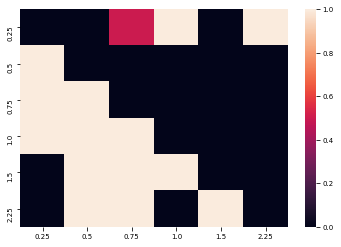

In [5]:
display(reinforce.task.dframe)
display(reinforce.task.complementary)
display(reinforce.df_finale)
sbn.heatmap(reinforce.df_finale)

In [12]:
actor_rewards = torch.load("models/actor_rewards.pt")
errors = torch.load("models/actor_errors.pt")
critic_losses = torch.load("models/critic_loss.pt")

Text(0.5, 1.0, 'Critic loss')

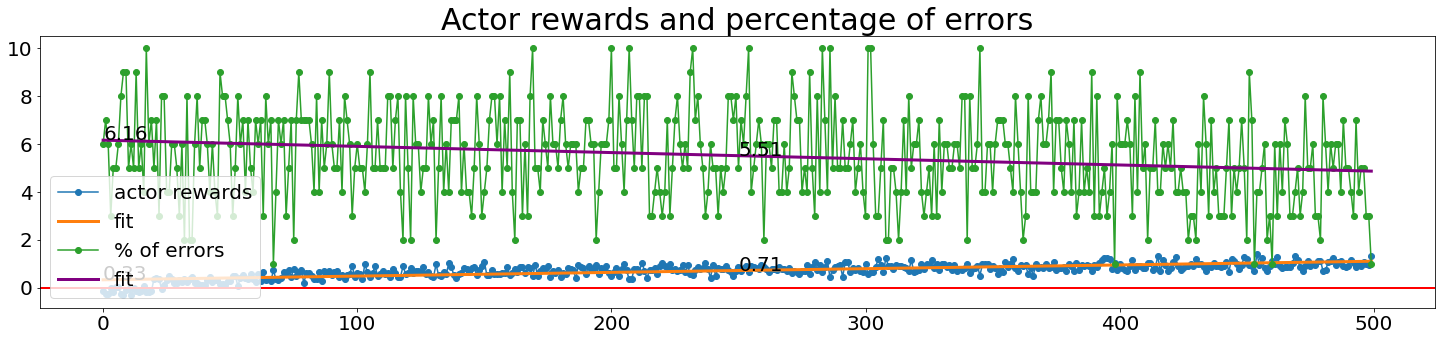

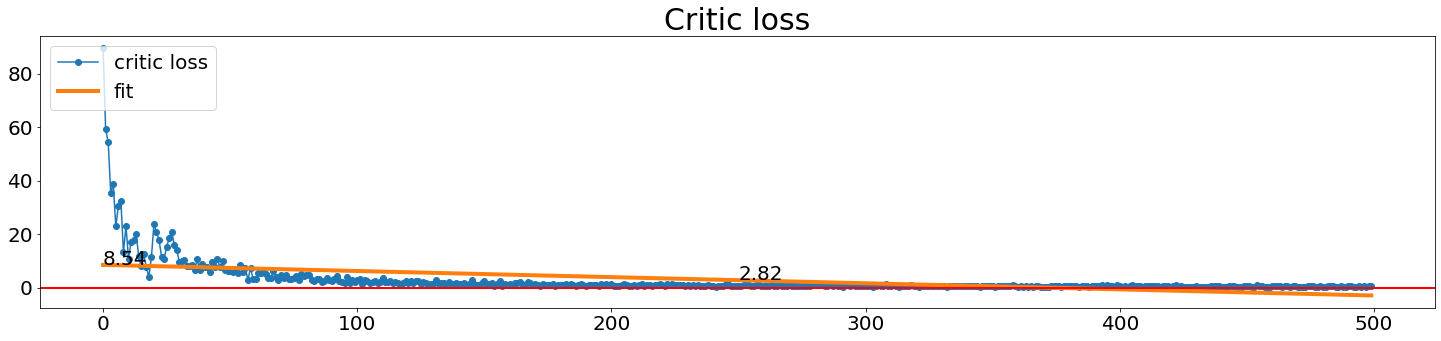

In [13]:
plt.figure(figsize=(25,5))

length = np.linspace(0, len(critic_losses)-1, len(critic_losses))
fit = np.polyfit(length, actor_rewards, 1)
fit2 = np.polyfit(length, errors, 1)

plt.plot(length, actor_rewards, "-o", label="actor rewards")
plt.plot(length, fit[1]+length*fit[0], "-", linewidth=3, label="fit")
plt.plot(length, errors, "-o", label="% of errors")
plt.plot(length, fit2[1]+length*fit2[0], "-", linewidth=3, label="fit", color="purple")
plt.axhline(0, linewidth=2, color="red")

for i in range(int(len(critic_losses)/250)):
    plt.text(length[250*i], fit2[1]+length[250*i]*fit2[0], str(round(fit2[1]+length[250*i]*fit2[0], 2)), fontsize=20, color="black")
    
for i in range(int(len(critic_losses)/250)):
    plt.text(length[250*i], fit[1]+length[250*i]*fit[0], str(round(fit[1]+length[250*i]*fit[0], 2)), fontsize=20, color="black")
    
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize=20, loc="lower left")
plt.title("Actor rewards and percentage of errors", fontsize=30)

#==========================================================================================================================================

#plt.figure(figsize=(25,5))
#
#length_b = np.linspace(0, len(critic_losses[3000:])-1, len(critic_losses[3000:]))
#fit1_b = np.polyfit(length_b, actor_rewards[3000:], 1)
#fit2_b = np.polyfit(length_b, errors[3000:], 1)
#
#plt.plot(length_b, actor_rewards[3000:], "-o", label="actor rewards")
#plt.plot(length_b, fit1_b[1]+length_b*fit1_b[0], "-", linewidth=4, label="fit")
#plt.plot(length_b, errors[3000:], "-o", label="% of errors")
#plt.plot(length_b, fit2_b[1]+length_b*fit2_b[0], "-", linewidth=4, label="fit", color="purple")
#plt.axhline(0, linewidth=2, color="red")
#
#for i in range(int(len(length_b)/200)):
#    plt.text(length_b[200*i], fit1_b[1]+length_b[200*i]*fit1_b[0], str(round(fit1_b[1]+length_b[200*i]*fit1_b[0], 2)), fontsize=20, color="black")
#
#for i in range(int(len(length_b)/200)):
#    plt.text(length_b[200*i], fit2_b[1]+length_b[200*i]*fit2_b[0], str(round(fit2_b[1]+length_b[200*i]*fit2_b[0], 2)), fontsize=20, color="black")
#
#plt.xticks(size=20)
#plt.yticks(size=20)
#plt.legend(fontsize=20, loc="upper left")
#plt.title("Zoom on actor rewards and percentage of errors", fontsize=30)
#
#==========================================================================================================================================

plt.figure(figsize=(25,5))
    
fit3 = np.polyfit(length, critic_losses, 1)

plt.plot(length, critic_losses, "-o", label="critic loss")
plt.plot(length, fit3[1]+length*fit3[0], "-", linewidth=4, label="fit")
plt.axhline(0, linewidth=2, color="red")

for i in range(int(len(length)/250)):
    plt.text(length[250*i], fit3[1]+length[250*i]*fit3[0], str(round(fit3[1]+length[250*i]*fit3[0], 2)), fontsize=20, color="black")

plt.xticks(size=20)
plt.yticks(size=20)
#plt.ylim(0,0.5)
plt.legend(fontsize=20, loc="upper left")
plt.title("Critic loss", fontsize=30);

#==========================================================================================================================================

#plt.figure(figsize=(25,5))
#    
#fit3_b = np.polyfit(length_b, critic_losses[3000:], 1)
#
#plt.plot(length_b, critic_losses[3000:], "-o", label="critic loss")
#plt.plot(length_b, fit3_b[1]+length_b*fit3_b[0], "-", linewidth=4, label="fit")
#plt.axhline(0, linewidth=2, color="red")
#
#for i in range(int(len(length_b)/200)):
#    plt.text(length_b[200*i], fit3_b[1]+length_b[200*i]*fit3_b[0], str(round(fit3_b[1]+length_b[200*i]*fit3_b[0], 2)), fontsize=20, color="black")
#
#plt.xticks(size=20)
#plt.yticks(size=20)
##plt.ylim(0,0.5)
#plt.legend(fontsize=20, loc="upper left")
#plt.title("Zoom on critic loss", fontsize=30);

In [16]:
reinforce = rln.REINFORCE(name_load_actor="models/RL_actor_network.pt",
                          name_load_critic="models/RL_critic_network.pt")

In [17]:
iterations = 100 
observations, rewards, actions, log_probs, entropies, values,\
trial_begins, errors = reinforce.experience(iterations)
print (len(errors), errors+1)

iteration 100


,0.25,0.5,0.75,1.0,1.5,2.25
0.25,0.0,0.0,0.0,0.0,0.0,0.0
0.5,0.0,0.0,0.0,0.0,0.0,0.0
0.75,0.0,0.0,0.0,0.0,0.0,0.0
1.0,0.0,0.0,0.0,0.0,0.0,0.0
1.5,0.0,0.0,0.0,0.0,0.0,0.0
2.25,0.0,0.0,0.0,0.0,0.0,0.0


,0.25,0.5,0.75,1.0,1.5,2.25
0.25,0.0,0.0,0.0,0.0,0.0,0.0
0.5,0.0,0.0,0.0,0.0,0.0,0.0
0.75,0.0,0.0,0.0,0.0,0.0,0.0
1.0,0.0,0.0,0.0,0.0,0.0,0.0
1.5,0.0,0.0,0.0,0.0,0.0,0.0
2.25,0.0,0.0,0.0,0.0,0.0,0.0


33 [ 2  5  7 17 19 24 25 27 32 33 37 42 43 45 47 49 50 52 57 61 65 66 67 72
 75 79 83 87 88 89 92 93 99]


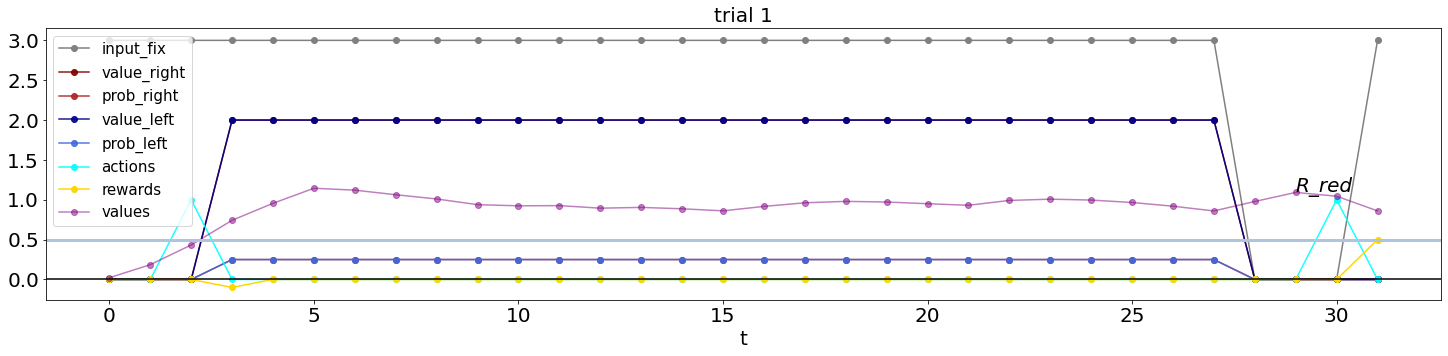

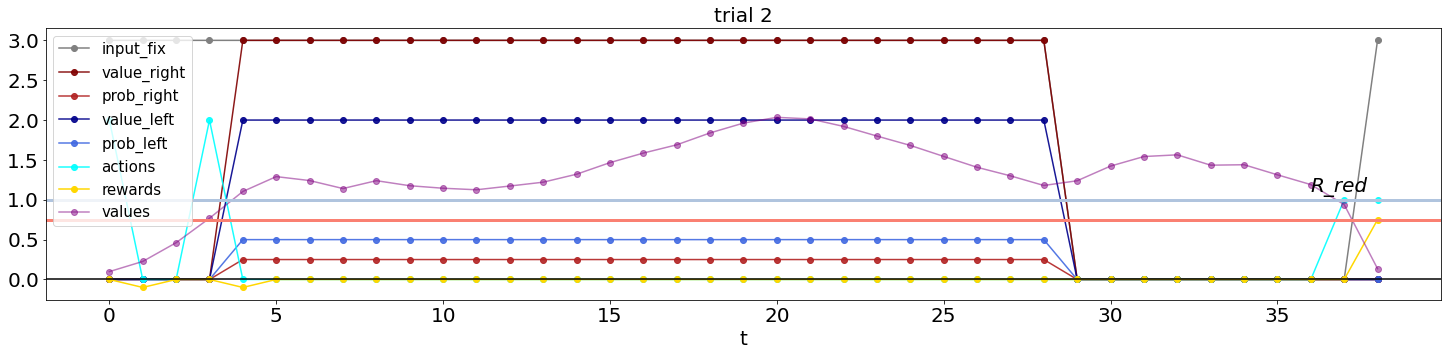

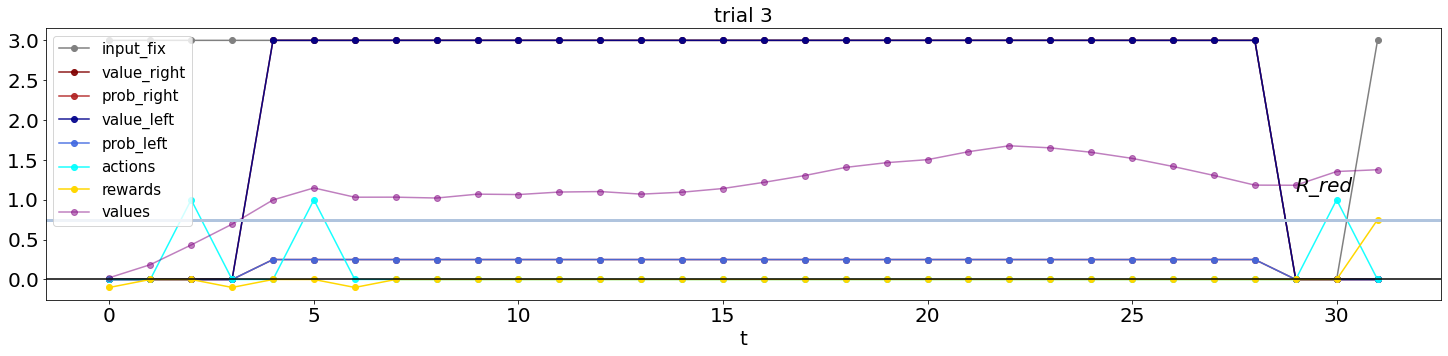

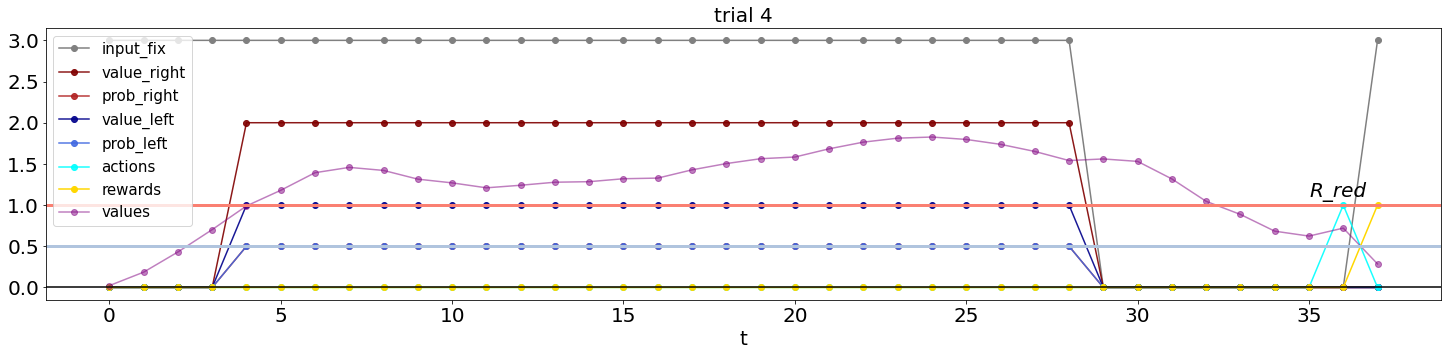

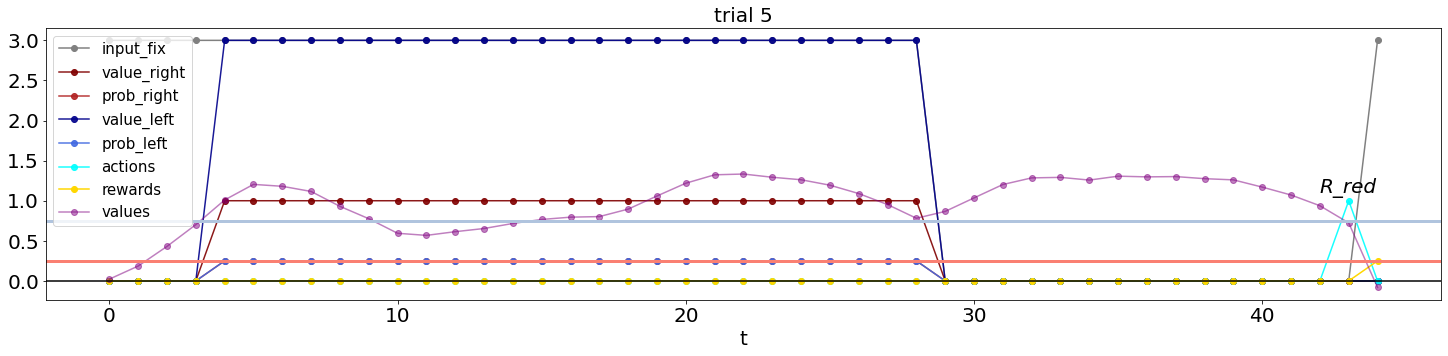

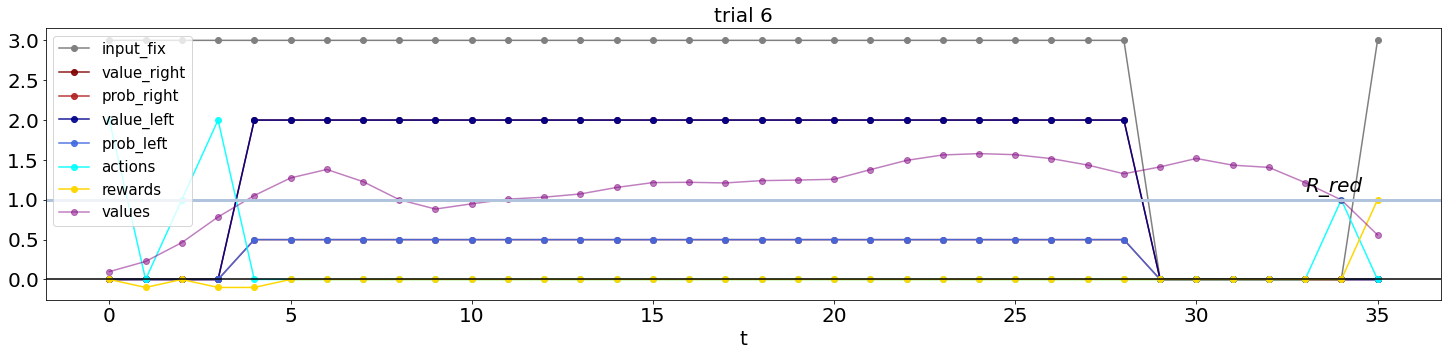

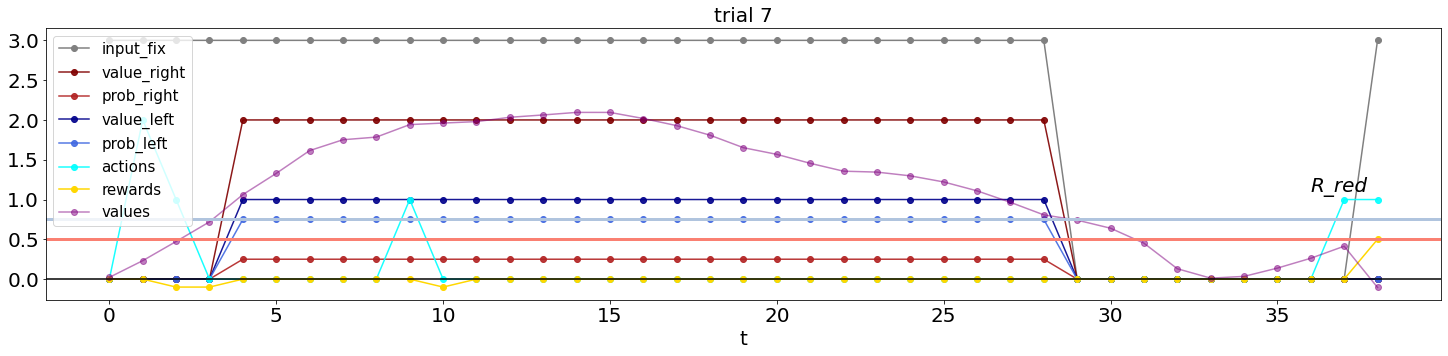

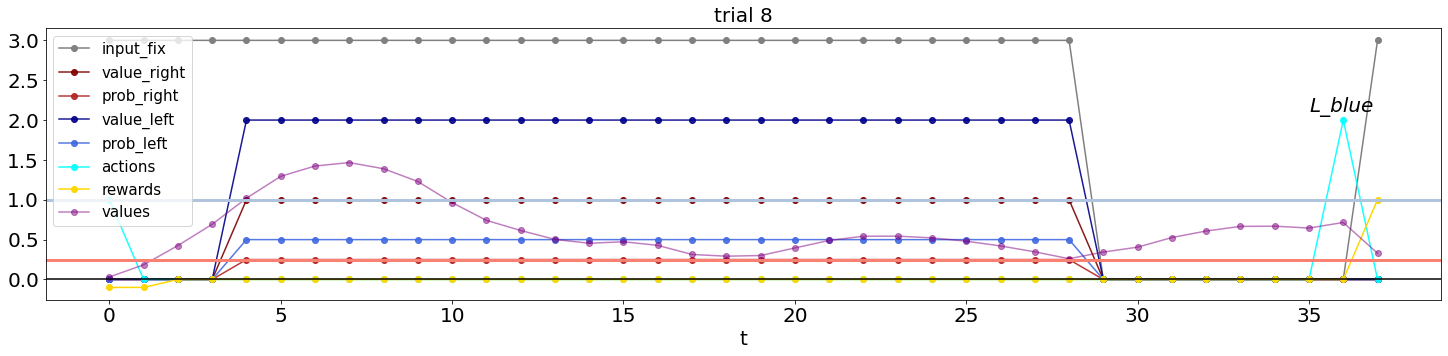

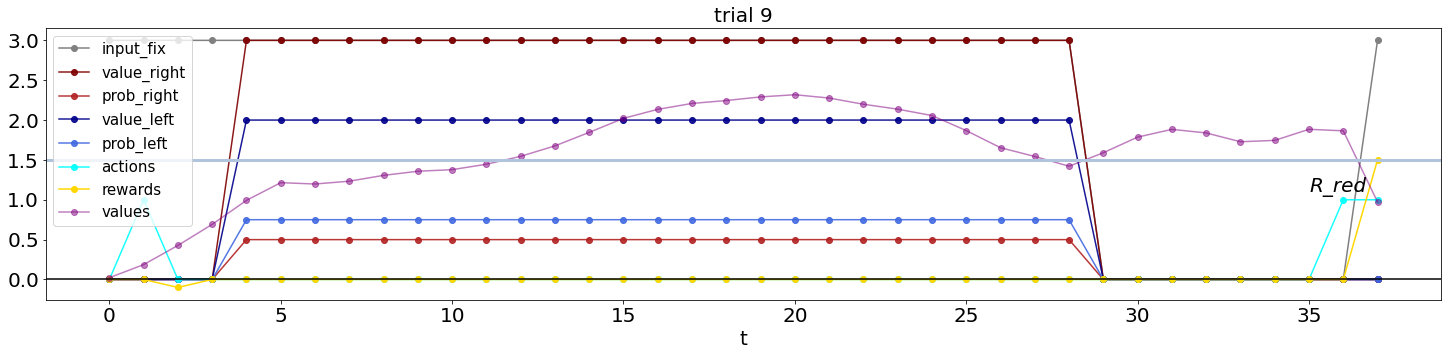

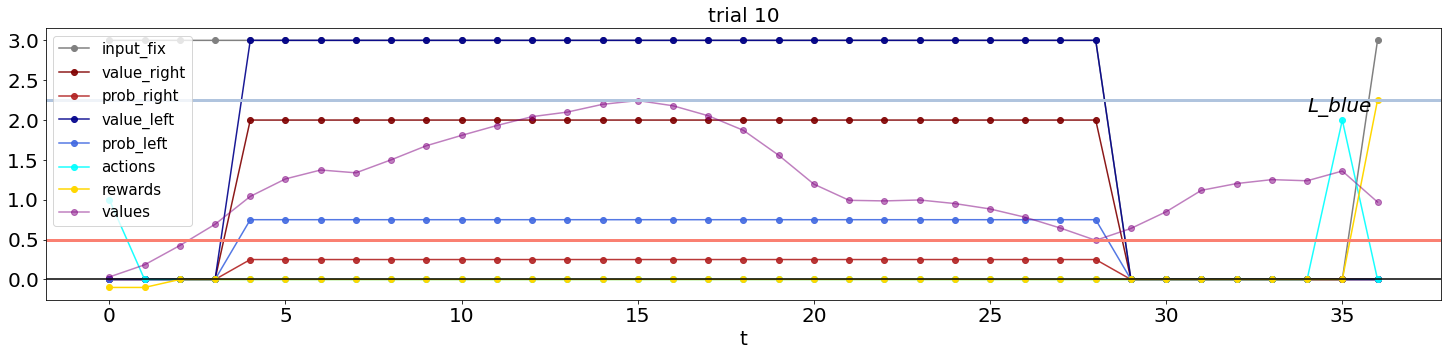

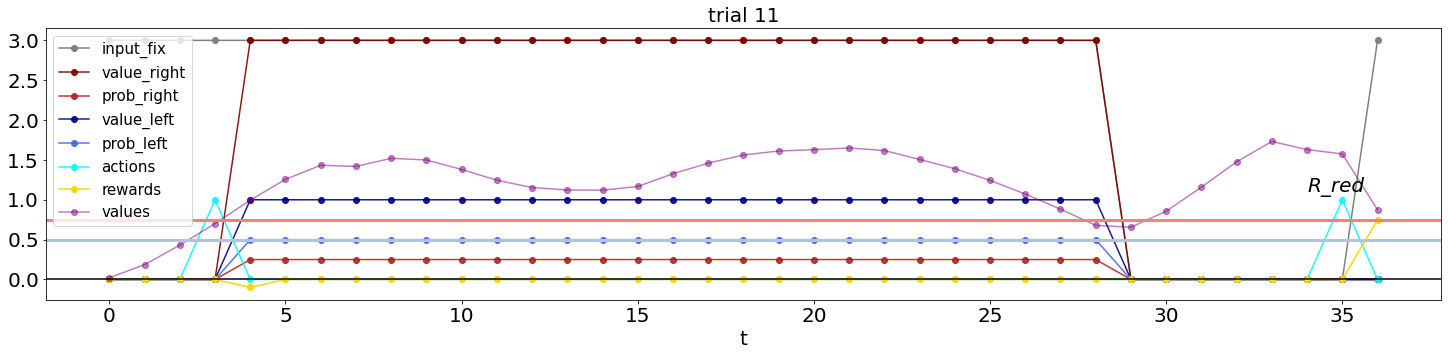

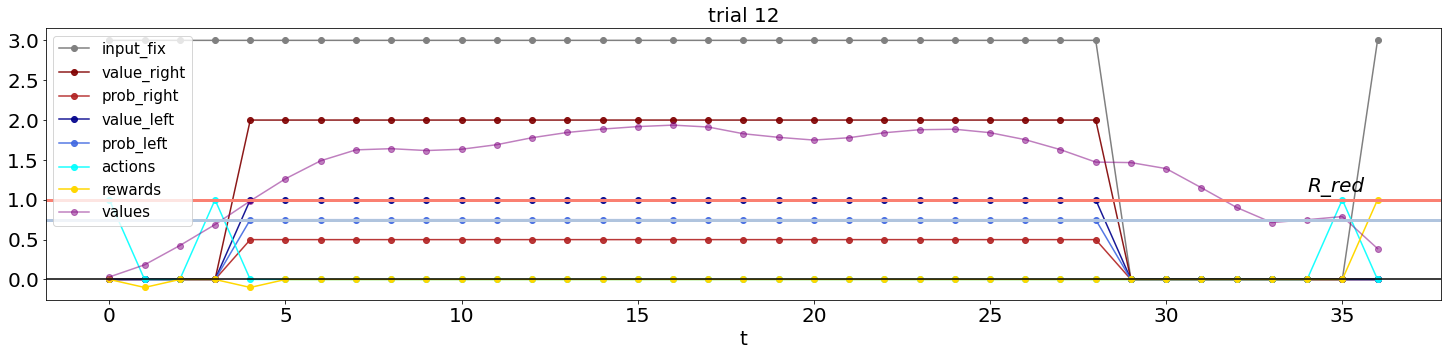

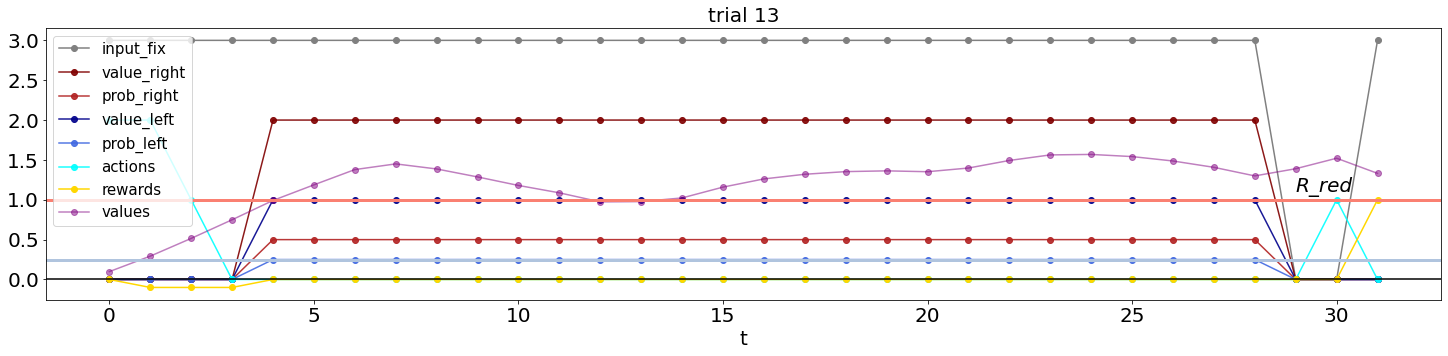

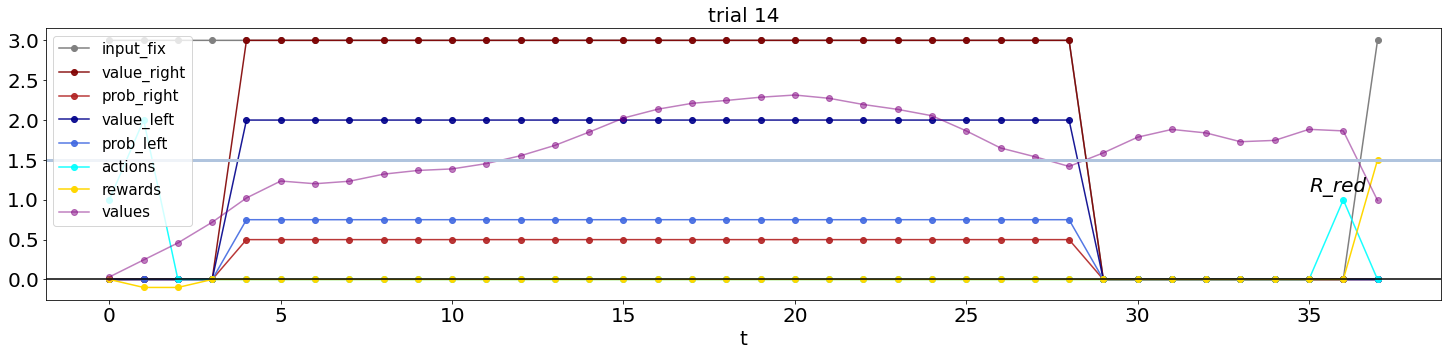

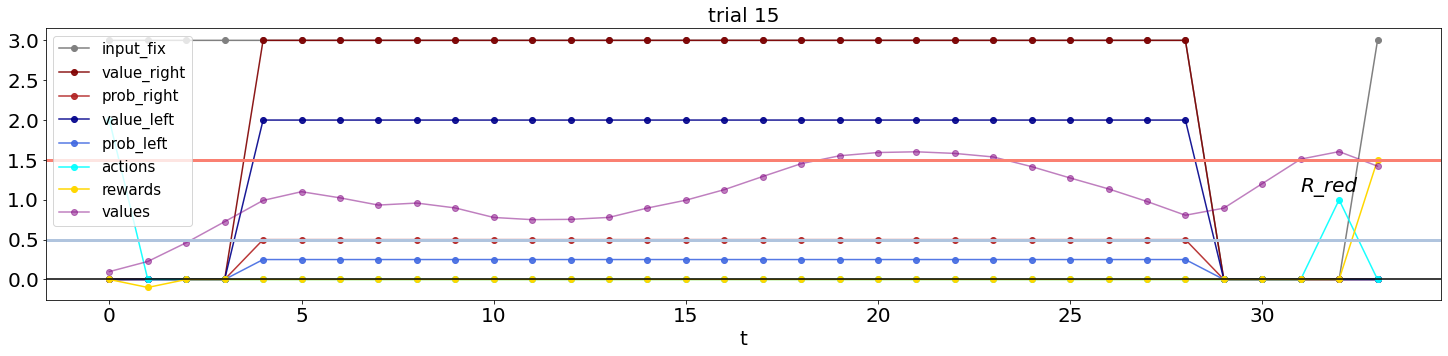

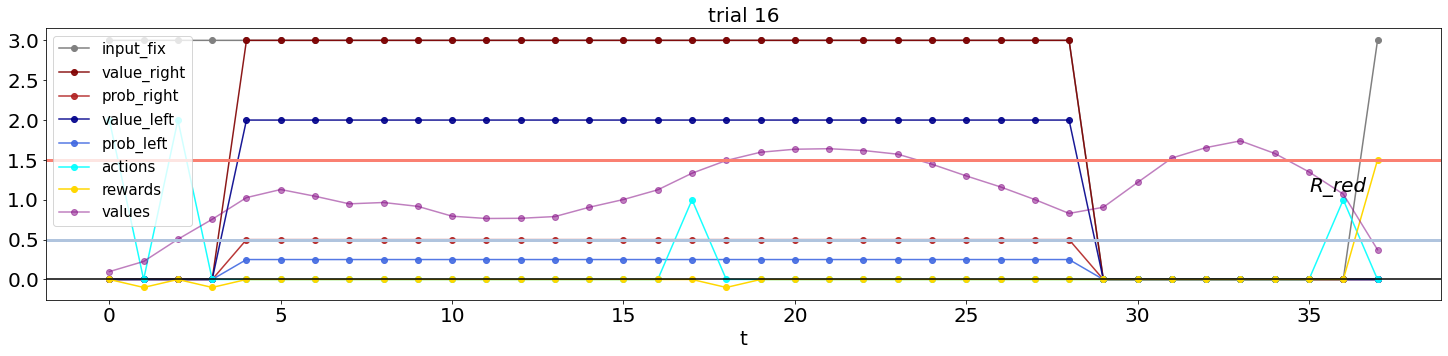

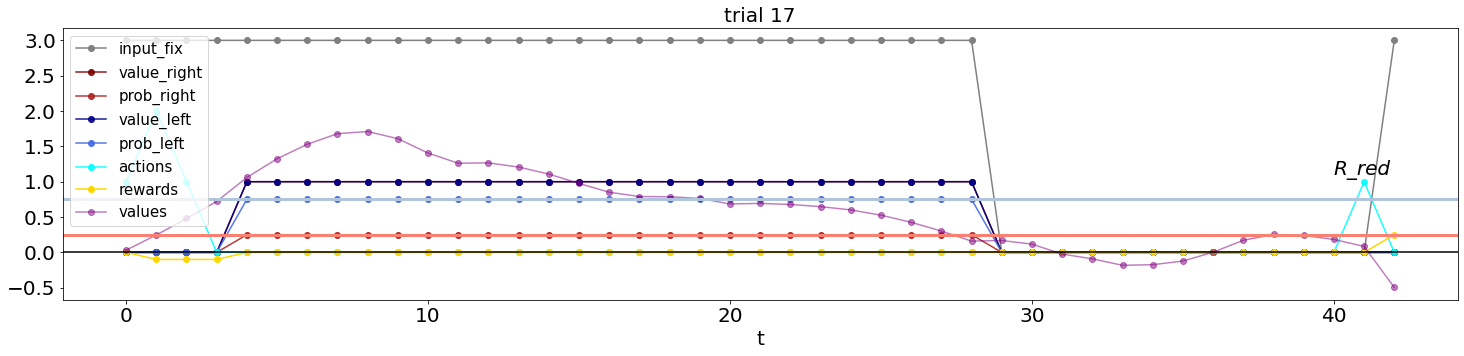

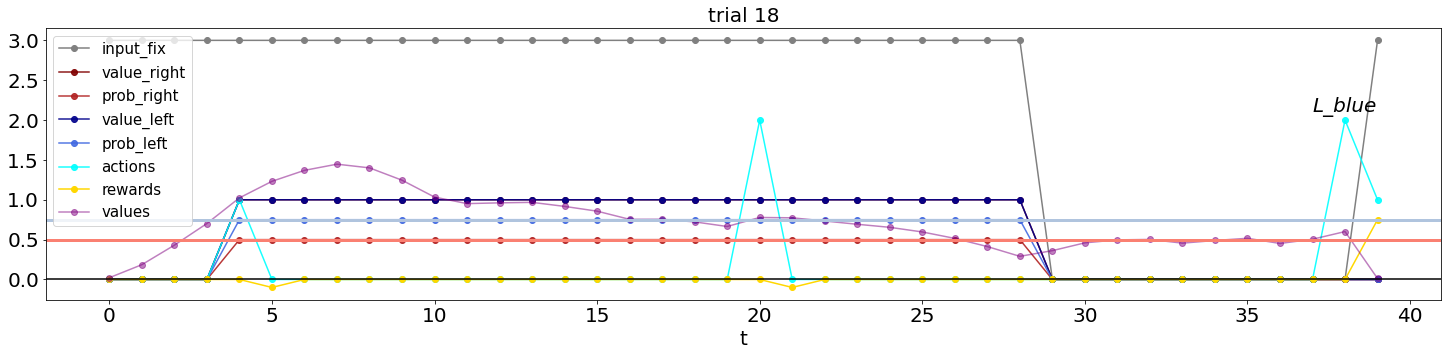

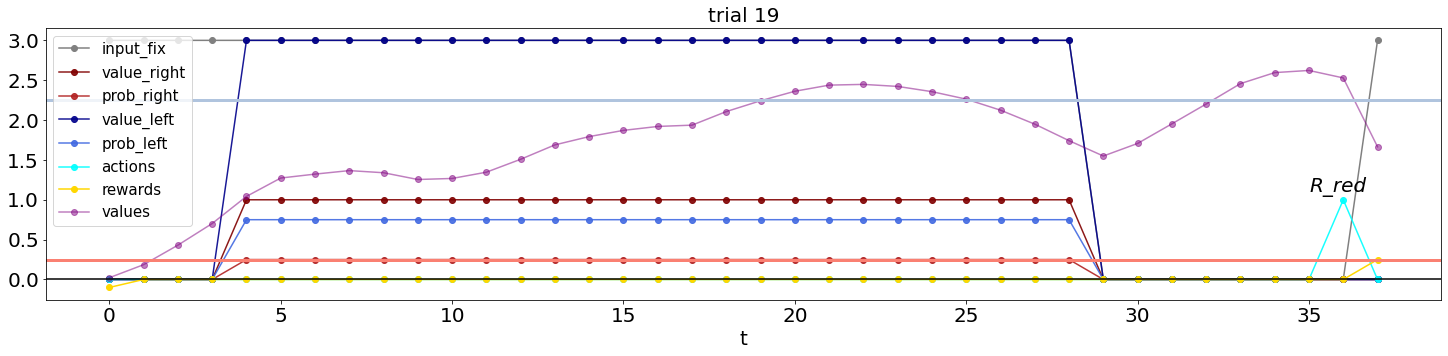

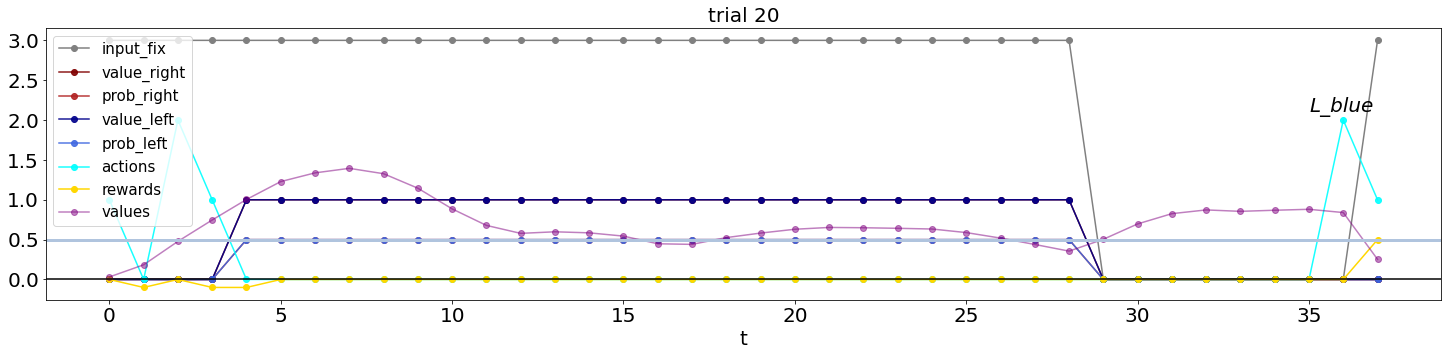

In [18]:
obs = np.asarray(observations).T
length = 0
for i in range(20):

    plt.figure(figsize=(25,5))

    start = int(trial_begins[i])
    stop = int(trial_begins[i+1])

    plt.plot(obs[0][start:stop], "-o", label="input_fix", color="gray")
    plt.plot(obs[1][start:stop], "-o", label="value_right", color="maroon", alpha=0.9)
    plt.plot(obs[2][start:stop], "-o", label="prob_right", color="firebrick", alpha=0.9)
    plt.plot(obs[3][start:stop], "-o", label="value_left", color="darkblue", alpha=0.9)
    plt.plot(obs[4][start:stop], "-o", label="prob_left", color="royalblue", alpha=0.9)
    plt.plot(actions[start:stop], "-o", label="actions", color="cyan", alpha=0.9)
    plt.plot(rewards[start:stop], "-o", label="rewards", color="gold", alpha=1)
    #plt.plot(cum_rho[start:stop], "-o", label="cum_rho", color="cyan", alpha=0.5)
    plt.plot(values.clone().detach().numpy()[start:stop], "-o", label="values", color="purple", alpha=0.5)
    #plt.plot(stop-length-2, gt[i], "*", markersize=25, color="orange")
    plt.axhline(0, color="black")
    plt.axhline(obs[1][start+10]*obs[2][start+10], color="salmon", linewidth=3)
    plt.axhline(obs[3][start+10]*obs[4][start+10], color="lightsteelblue", linewidth=3)
    length += len(obs[0][start:stop])

    plt.xlabel("t", size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.title("trial %i" %(i+1), size=20)
    if actions[start:stop][-2] == 1:
        plt.text(len(actions[start:stop])-3, 1.1, 'R_red', style='italic', fontsize=20)
    elif actions[start:stop][-2] == 2:
        plt.text(len(actions[start:stop])-3, 2.1, 'L_blue', style='italic', fontsize=20)
    plt.legend(fontsize=15, loc="upper left");